# Report-accident-claims

* 祝鸿志
* 2021202742

## 任务简介
任务类型：二元分类,背景介绍：在交通摩擦（事故）发生后，理赔员会前往现场勘察、采集信息，这些信息往往影响着车主是否能够得到保险公司的理赔。训练集数据包括理赔人员在现场对该事故方采集的36条信息，信息已经被编码，以及该事故方最终是否获得理赔。我们的任务是根据这36条信息预测该事故方没有被理赔的概率。数据介绍：训练集中共有200000条样本，预测集中有80000条样本。 

## 解决途径


### 导入相关包并对数据进行可视化

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
# %matplotlib inline

# read data
homePath = "data"
trainPath = os.path.join(homePath, "train.csv")
testPath = os.path.join(homePath, "test.csv")
submitPath = os.path.join(homePath, "sample_submit.csv")
trainData = pd.read_csv(trainPath)
testData = pd.read_csv(testPath)
submitData = pd.read_csv(submitPath)

trainData.drop("CaseId", axis=1, inplace=True)
testData.drop("CaseId", axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Q1          200000 non-null  int64
 1   Q2          200000 non-null  int64
 2   Q3          200000 non-null  int64
 3   Q4          200000 non-null  int64
 4   Q5          200000 non-null  int64
 5   Q6          200000 non-null  int64
 6   Q7          200000 non-null  int64
 7   Q8          200000 non-null  int64
 8   Q9          200000 non-null  int64
 9   Q10         200000 non-null  int64
 10  Q11         200000 non-null  int64
 11  Q12         200000 non-null  int64
 12  Q13         200000 non-null  int64
 13  Q14         200000 non-null  int64
 14  Q15         200000 non-null  int64
 15  Q16         200000 non-null  int64
 16  Q17         200000 non-null  int64
 17  Q18         200000 non-null  int64
 18  Q19         200000 non-null  int64
 19  Q20         200000 non-null  int64
 20  Q21 

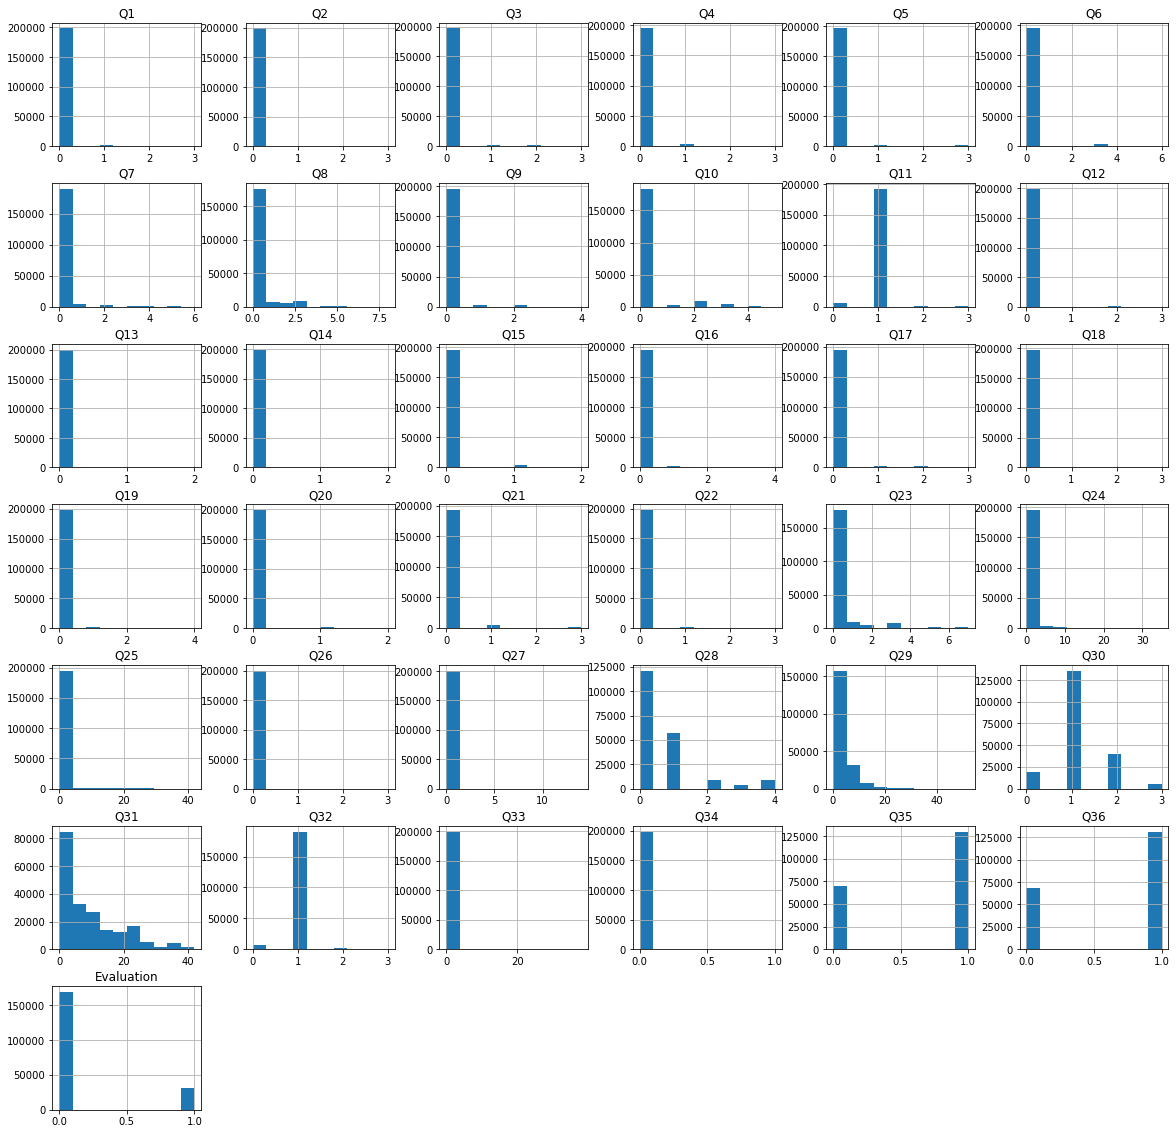

In [5]:
# # 快速了解数据
#
# ~head()：默认显示前5行数据，可指定显示多行，例如.head(15)显示前15行
#

trainData.head(15)


# 显示数据简略信息，可以每列有多少非空的值，以及每列数据对应的数据类型。
#
#

trainData.info()


# ~hist():绘制直方图，参数figsize可指定输出图片的尺寸。
#

trainData.hist(figsize=(20, 20))


# 想要了解特征之间的相关性，可计算相关系数矩阵。然后可对某个特征来排序。
#
#

corr_matrix = trainData.corr()
corr_matrix["Evaluation"].sort_values(ascending=False) # ascending=False 降序排列

# 从训练集中分离标签

y = trainData['Evaluation']
trainData.drop("Evaluation", axis=1, inplace=True)

In [8]:
trainData.describe()

Q1             Q2             Q3             Q4  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.016445       0.010875       0.024925       0.038560   
std         0.182496       0.141269       0.213645       0.263483   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         3.000000       3.000000       3.000000       3.000000   

                  Q5             Q6             Q7             Q8  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.039130       0.080335       0.113725       0.294165   
std         0.301528       0.508923       0.589884       0.916137   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         3.000000       6.000000       6.000000       8.000000   

                  Q9            Q10  ...            Q27            Q28  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.038810       0.192490  ...       0.000820       0.611760   
std         0.267851       0.681946  ...       0.083901       0.984868   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       1.000000   
max         4.000000       5.000000  ...      14.000000       4.000000   

                 Q29            Q30            Q31            Q32  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        4.034760       1.163025       9.428990       0.979740   
std         3.815101       0.616417       9.004402       0.238725   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000       2.000000       1.000000   
50%         3.000000       1.000000       6.000000       1.000000   
75%         5.000000       1.000000      14.000000       1.000000   
max        52.000000       3.000000      42.000000       3.000000   

                 Q33            Q34           Q35            Q36  
count  200000.000000  200000.000000  200000.00000  200000.000000  
mean        0.032945       0.005520       0.64946       0.657345  
std         0.802953       0.074092       0.47714       0.474598  
min         0.000000       0.000000       0.00000       0.000000  
25%         0.000000       0.000000       0.00000       0.000000  
50%         0.000000       0.000000       1.00000       1.000000  
75%         0.000000       0.000000       1.00000       1.000000  
max        38.000000       1.000000       1.00000       1.000000  

[8 rows x 36 columns]

In [7]:
testData.describe()

Q1            Q2            Q3            Q4            Q5  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean       0.017663      0.009713      0.025288      0.040025      0.039150   
std        0.188682      0.132640      0.214415      0.269210      0.302107   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        3.000000      3.000000      3.000000      3.000000      3.000000   

                 Q6            Q7            Q8            Q9           Q10  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean       0.081363      0.113900      0.297525      0.039038      0.191625   
std        0.517442      0.590683      0.922843      0.273065      0.676839   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        6.000000      6.000000      8.000000      4.000000      5.000000   

       ...           Q27           Q28           Q29           Q30  \
count  ...  80000.000000  80000.000000  80000.000000  80000.000000   
mean   ...      0.000525      0.610900      4.034662      1.161963   
std    ...      0.081085      0.988086      3.871637      0.616855   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      2.000000      1.000000   
50%    ...      0.000000      0.000000      3.000000      1.000000   
75%    ...      0.000000      1.000000      5.000000      1.000000   
max    ...     16.000000      4.000000     51.000000      3.000000   

                Q31           Q32           Q33           Q34           Q35  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean       9.383950      0.979900      0.039137      0.005562      0.647275   
std        8.990866      0.242016      0.876892      0.074375      0.477821   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      0.000000      0.000000      0.000000   
50%        6.000000      1.000000      0.000000      0.000000      1.000000   
75%       14.000000      1.000000      0.000000      0.000000      1.000000   
max       42.000000      3.000000     40.000000      1.000000      1.000000   

                Q36  
count  80000.000000  
mean       0.655012  
std        0.475367  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 36 columns]

* 可以看出，数据是非常干净的，不需要我们对数据进行后续的清晰
* 数据矩阵非常稀疏，有必要对数据进行降维处理

### 对数据进行降维处理
* 保留99%的方差

In [12]:
full_Featurues = pd.concat([trainData, testData])
full_Featurues

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q27  Q28  Q29  Q30  Q31  \
0       0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0    0   
1       0   0   0   0   0   0   0   0   0    0  ...    0    0    1    1    1   
2       0   0   0   0   0   0   0   1   0    0  ...    0    1    2    2    2   
3       0   0   0   0   0   0   0   0   0    0  ...    0    1    3    2    3   
4       0   0   0   0   0   0   0   0   0    0  ...    0    1    4    2    4   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
79995   0   0   0   0   0   0   0   0   0    0  ...    0    0    3    1    1   
79996   0   0   0   0   0   0   0   0   0    0  ...    0    0    2    1    3   
79997   0   0   0   0   0   0   0   0   0    0  ...    0    4    3    2    4   
79998   0   0   0   0   0   0   0   0   0    0  ...    0    0    0    0   17   
79999   0   0   0   0   0   0   0   0   0    0  ...    0    1    3    2    3   

       Q32  Q33  Q34  Q35  Q36  
0        0    0    0    0    0  
1        1    0    0    0    0  
2        1    0    0    0    0  
3        1    0    0    1    1  
4        1    0    0    1    1  
...    ...  ...  ...  ...  ...  
79995    1    0    0    1    1  
79996    1    0    0    0    0  
79997    1    0    0    1    1  
79998    0    0    0    0    0  
79999    1    0    0    1    1  

[280000 rows x 36 columns]

In [18]:
from sklearn.decomposition import PCA
pca_f = pd.DataFrame(PCA(n_components=0.99).fit_transform(full_Featurues))
pca_f

0         1         2         3         4         5         6   \
0      -9.393911 -4.146763 -0.143968 -0.150129  0.937429 -0.131366  0.548341   
1      -8.418964 -3.156567 -0.308848 -0.235392  0.678371  0.612373 -0.107985   
2      -7.415013 -2.156109 -0.411839  0.040574 -0.682519 -0.607402 -0.085246   
3      -6.387631 -1.040792 -0.481765 -0.011488 -0.687226  0.102025  0.492517   
4      -5.389460 -0.050978 -0.584408 -0.022485 -0.664893  0.099738  0.469330   
...          ...       ...       ...       ...       ...       ...       ...   
279995 -8.556638 -1.050005 -0.514545 -0.432206  0.735451  4.136317 -3.190539   
279996 -6.392196 -2.167219 -0.402801 -0.196285  0.663335 -0.090471  0.436810   
279997 -5.388826 -0.972414 -0.237541  0.534527 -3.438700  0.515002  0.702294   
279998  7.592631 -4.139552  0.025626 -0.110362  0.922632 -0.107442  0.025580   
279999 -6.387631 -1.040792 -0.481765 -0.011488 -0.687226  0.102025  0.492517   

              7         8         9         10        11  
0       0.074915 -0.526297  0.925416 -0.338389 -0.600274  
1       0.176360 -0.235197  0.457981 -0.152492  0.245794  
2      -0.026334 -0.224973  0.315857 -0.134410  0.899834  
3      -0.300393 -0.369481 -0.783666 -0.275326  0.218137  
4      -0.314800 -0.371312 -0.714114 -0.285494  0.260627  
...          ...       ...       ...       ...       ...  
279995  1.101358  1.055725 -0.543136  0.541650 -0.364700  
279996 -0.037181 -0.438252  0.528718 -0.274249  0.283002  
279997 -0.348461 -0.421158 -0.015018 -0.332774 -0.232196  
279998  0.245596 -0.156409  0.970475 -0.186683 -0.653063  
279999 -0.300393 -0.369481 -0.783666 -0.275326  0.218137  

[280000 rows x 12 columns]

In [28]:
XTrain = pca_f.iloc[:200000,:]
XTest = pca_f.loc[200000:,:]
yTrain = y

* 降维后的数据一共有12个维度

In [21]:
feaTrain

0         1         2         3         4         5         6   \
0       -9.393911 -4.146763 -0.143968 -0.150129  0.937429 -0.131366  0.548341   
1       -8.418964 -3.156567 -0.308848 -0.235392  0.678371  0.612373 -0.107985   
2       -7.415013 -2.156109 -0.411839  0.040574 -0.682519 -0.607402 -0.085246   
3       -6.387631 -1.040792 -0.481765 -0.011488 -0.687226  0.102025  0.492517   
4       -5.389460 -0.050978 -0.584408 -0.022485 -0.664893  0.099738  0.469330   
...           ...       ...       ...       ...       ...       ...       ...   
199995  25.584323 -1.027472 -0.162182  0.060428 -0.713553  0.146037 -0.483168   
199996  27.576873 -1.039951 -0.158756 -0.080995  0.487232 -0.028494 -0.600567   
199997  -6.386887  3.892556 -1.064609 -0.209945  0.630338 -0.091157  0.388732   
199998  -8.411203  6.860586 -1.424122 -0.290416  0.737641  0.598706 -0.187682   
199999  11.623101 -2.160670 -0.209142 -0.193405  0.655072 -0.066205 -0.141308   

              7         8         9         10        11  
0       0.074915 -0.526297  0.925416 -0.338389 -0.600274  
1       0.176360 -0.235197  0.457981 -0.152492  0.245794  
2      -0.026334 -0.224973  0.315857 -0.134410  0.899834  
3      -0.300393 -0.369481 -0.783666 -0.275326  0.218137  
4      -0.314800 -0.371312 -0.714114 -0.285494  0.260627  
...          ...       ...       ...       ...       ...  
199995  0.016646  0.316188 -0.711814  0.005214  0.118344  
199996  0.178922  0.359813 -0.475673  0.017263 -0.480288  
199997 -0.257754 -0.372282 -0.213413 -0.277375 -0.158579  
199998 -0.126086 -0.178365 -0.005936 -0.152662 -0.014868  
199999  0.182401 -0.086702  0.552142 -0.536919  1.286243  

[200000 rows x 12 columns]

In [22]:
feaTest

0         1          2         3         4         5         6   \
200000  2.612682 -2.160827  -0.305585 -0.200653  0.655476 -0.070185  0.434702   
200001 -1.505857  2.168386  10.294969 -2.590358 -0.917355 -0.270105  0.236479   
200002 -6.389953 -1.054166  -0.497776 -0.158239  0.515004 -0.074932  0.428254   
200003 -8.443798 -1.030700  -0.438827 -0.070367 -0.327338  1.464337 -0.662644   
200004  3.605708  1.941332  -0.657584  0.010161 -0.337045  0.067112  0.195593   
...          ...       ...        ...       ...       ...       ...       ...   
279995 -8.556638 -1.050005  -0.514545 -0.432206  0.735451  4.136317 -3.190539   
279996 -6.392196 -2.167219  -0.402801 -0.196285  0.663335 -0.090471  0.436810   
279997 -5.388826 -0.972414  -0.237541  0.534527 -3.438700  0.515002  0.702294   
279998  7.592631 -4.139552   0.025626 -0.110362  0.922632 -0.107442  0.025580   
279999 -6.387631 -1.040792  -0.481765 -0.011488 -0.687226  0.102025  0.492517   

              7         8         9         10        11  
200000 -0.034758 -1.685316  0.508162  3.483733  0.322794  
200001 -0.034933 -0.152440  0.416037 -0.229508 -1.048230  
200002 -0.155412 -0.360861 -0.561181 -0.281070 -0.384726  
200003  0.232357  0.065696 -0.302303 -0.034043 -0.523501  
200004 -0.144070 -0.214028 -0.050831 -0.263275 -0.439549  
...          ...       ...       ...       ...       ...  
279995  1.101358  1.055725 -0.543136  0.541650 -0.364700  
279996 -0.037181 -0.438252  0.528718 -0.274249  0.283002  
279997 -0.348461 -0.421158 -0.015018 -0.332774 -0.232196  
279998  0.245596 -0.156409  0.970475 -0.186683 -0.653063  
279999 -0.300393 -0.369481 -0.783666 -0.275326  0.218137  

[80000 rows x 12 columns]

### 训练模型，我们的策略是采用多种模型，使用ray_tune自动调参工具进行调参，我们分别训练一下模型
* SVM
* LogisticRegression
* RandomForestClassifier
* XGboostClassifier

In [55]:
from tune_sklearn import TuneSearchCV
from scipy.stats import randint
import scipy
from ray import tune
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier as XGBC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
def rayTuneClassifier(clf, params, Xtrain, ytrain):
    hyperopt_tune_search = TuneSearchCV(clf, **params,scoring="accuracy")
    hyperopt_tune_search.fit(Xtrain, ytrain)
    return hyperopt_tune_search

In [68]:
#SVM
param_dists = {
    'loss':tune.choice(['squared_hinge','hinge']),
    'alpha':tune.loguniform(1e-4,1e-1),
    'epsilon':tune.uniform(1e-2,1e-1),
}
tune_params = {
    "param_distributions":param_dists,
    "n_trials":10,
    "early_stopping":True,
    "max_iters":10,
    "search_optimization":"hyperopt",
}
SVM_clf = rayTuneClassifier(SGDClassifier(), tune_params, XTrain, yTrain)
SVM_clf.cv_results_


(pid=13376) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
(pid=13376)   from ray.tune.suggest.suggestion import Searcher
(pid=13376) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
(pid=13376) ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
(pid=13376)   from ray.tune.suggest.suggestion import Searcher
(pid=13376) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\

(pid=13376) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray.tune.suggest.hyperopt` has been moved to `ray.tune.search.hyperopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.hyperopt` with `ray.tune.search.hyperopt`.
(pid=13376)   from ray.tune.suggest.hyperopt import HyperOptSearch
(pid=36788) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray.tune.suggest.hyperopt` has been moved to `ray.tune.search.hyperopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.hyperopt` with `ray.tune.search.hyperopt`.
(pid=36788)   from ray.tune.suggest.hyperopt import HyperOptSearch
(pid=30500) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_sea

2022-09-11 14:52:40,262	INFO tensorboardx.py:267 -- Removed the following hyperparameter values when logging to tensorboard: {'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False), 'early_stop_type': <EarlyStopping.PARTIAL_FIT: 1>, 'scoring/score': make_scorer(accuracy_score)}
2022-09-11 14:52:40,774	INFO tensorboardx.py:267 -- Removed the following hyperparameter values when logging to tensorboard: {'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False), 'early_stop_type': <EarlyStopping.PARTIAL_FIT: 1>, 'scoring/score': make_scorer(accuracy_score)}
2022-09-11 14:52:40,824	INFO tensorboardx.py:267 -- Removed the following hyperparameter values when logging to tensorboard: {'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False), 'early_stop_type': <EarlyStopping.PARTIAL_FIT: 1>, 'scoring/score': make_scorer(accuracy_score)}
2022-09-11 14:52:41,365	INFO tensorboardx.py:267 -- Removed the following hyperparameter values when logging to tensorboard:

{'params': [{'loss': 'hinge',
   'alpha': 0.017845951250207086,
   'epsilon': 0.06570692172146883},
  {'loss': 'hinge',
   'alpha': 0.0035726713389444107,
   'epsilon': 0.07487785616457268},
  {'loss': 'squared_hinge',
   'alpha': 0.003244591310577719,
   'epsilon': 0.051366313987349664},
  {'loss': 'squared_hinge',
   'alpha': 0.08710488371257372,
   'epsilon': 0.07590152122387861},
  {'loss': 'hinge',
   'alpha': 0.0007958799883822148,
   'epsilon': 0.013177224548926454},
  {'loss': 'squared_hinge',
   'alpha': 0.013902740661048598,
   'epsilon': 0.07180623341946614},
  {'loss': 'hinge',
   'alpha': 0.00027366701597733876,
   'epsilon': 0.07226195710487121},
  {'loss': 'squared_hinge',
   'alpha': 0.009061700815244086,
   'epsilon': 0.01228820362457739},
  {'loss': 'squared_hinge',
   'alpha': 0.0352055784932097,
   'epsilon': 0.05791324772092678},
  {'loss': 'hinge',
   'alpha': 0.09385730248332488,
   'epsilon': 0.05848850111357682},
  {'loss': 'hinge',
   'alpha': 0.05493091920503

In [54]:
#LR
param_dists = {
    'alpha':tune.loguniform(1e-4,1e-1),
    'epsilon':tune.uniform(1e-2,1e-1),
}
tune_params = {
    "param_distributions":param_dists,
    "n_trials":10,
    "early_stopping":True,
    "max_iters":10,
    "search_optimization":"hyperopt",
}
LR_clf = rayTuneClassifier(SGDClassifier(loss='log'), tune_params, XTrain, yTrain)
LR_clf.cv_results_

(pid=36456) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
(pid=36456)   from ray.tune.suggest.suggestion import Searcher
(pid=36456) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
(pid=36456) ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
(pid=36456)   from ray.tune.suggest.suggestion import Searcher
(pid=36456) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\

(pid=49288) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:18: DeprecationWarning: The module `ray.tune.suggest.skopt` has been moved to `ray.tune.search.skopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.skopt` with `ray.tune.search.skopt`.
(pid=49288)   from ray.tune.suggest.skopt import SkOptSearch
(pid=49288) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray.tune.suggest.hyperopt` has been moved to `ray.tune.search.hyperopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.hyperopt` with `ray.tune.search.hyperopt`.
(pid=49288)   from ray.tune.suggest.hyperopt import HyperOptSearch
(pid=36456) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:19: Depreca

{'params': [{'alpha': 0.001760871557610231, 'epsilon': 0.03064322286404631},
  {'alpha': 0.00798010541357694, 'epsilon': 0.07109377108393579},
  {'alpha': 0.006575374772400493, 'epsilon': 0.05543743729872883},
  {'alpha': 0.00011212897090719687, 'epsilon': 0.03846254916909888},
  {'alpha': 0.00032118156013927744, 'epsilon': 0.05398147637926824},
  {'alpha': 0.00034433683682237766, 'epsilon': 0.07245748324790911},
  {'alpha': 0.035008636733938406, 'epsilon': 0.08800318727126341},
  {'alpha': 0.00019907145306777985, 'epsilon': 0.04013140094950484},
  {'alpha': 0.00022769717265812514, 'epsilon': 0.09356970418432123},
  {'alpha': 0.007821703370841938, 'epsilon': 0.05173976264497403}],
 'split0_test_score': array([0.86125 , 0.85885 , 0.85955 , 0.781775, 0.8739  , 0.86725 ,
        0.861175, 0.7359  , 0.87065 , 0.862025]),
 'split1_test_score': array([0.86365 , 0.861225, 0.861425, 0.8781  , 0.7765  , 0.876225,
        0.8632  , 0.87185 , 0.796075, 0.862925]),
 'split2_test_score': array([0.8

In [70]:
#RandomForest
param_dists = {
    'n_estimators':tune.randint(50,300),
    'max_depth':tune.randint(2,20),
    'min_samples_leaf':tune.randint(1,200),
    'min_samples_split':tune.randint(2,100),
}
tune_params = {
    "param_distributions":param_dists,
    "n_trials":10,
    "max_iters":10,
    "search_optimization":"hyperopt",
}
Rf_clf = rayTuneClassifier(RandomForestClassifier(), tune_params, XTrain, yTrain)
Rf_clf.cv_results_

(pid=50064) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
(pid=50064)   from ray.tune.suggest.suggestion import Searcher
(pid=50064) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
(pid=50064) ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
(pid=50064)   from ray.tune.suggest.suggestion import Searcher
(pid=50064) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\

(pid=3892) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:18: DeprecationWarning: The module `ray.tune.suggest.skopt` has been moved to `ray.tune.search.skopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.skopt` with `ray.tune.search.skopt`.
(pid=3892)   from ray.tune.suggest.skopt import SkOptSearch
(pid=43104) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:15: DeprecationWarning: The module `ray.tune.suggest.bohb` has been moved to `ray.tune.search.bohb` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.bohb` with `ray.tune.search.bohb`.
(pid=43104)   from ray.tune.suggest.bohb import TuneBOHB
(pid=50064) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:19: DeprecationWarning: The module `ray

{'params': [{'n_estimators': 146,
   'max_depth': 16,
   'min_samples_leaf': 110,
   'min_samples_split': 81},
  {'n_estimators': 174,
   'max_depth': 4,
   'min_samples_leaf': 47,
   'min_samples_split': 40},
  {'n_estimators': 167,
   'max_depth': 15,
   'min_samples_leaf': 107,
   'min_samples_split': 27},
  {'n_estimators': 157,
   'max_depth': 12,
   'min_samples_leaf': 19,
   'min_samples_split': 48},
  {'n_estimators': 187,
   'max_depth': 8,
   'min_samples_leaf': 14,
   'min_samples_split': 37},
  {'n_estimators': 81,
   'max_depth': 18,
   'min_samples_leaf': 122,
   'min_samples_split': 33},
  {'n_estimators': 288,
   'max_depth': 7,
   'min_samples_leaf': 95,
   'min_samples_split': 20},
  {'n_estimators': 255,
   'max_depth': 11,
   'min_samples_leaf': 133,
   'min_samples_split': 4},
  {'n_estimators': 204,
   'max_depth': 8,
   'min_samples_leaf': 197,
   'min_samples_split': 6},
  {'n_estimators': 293,
   'max_depth': 5,
   'min_samples_leaf': 177,
   'min_samples_split

In [71]:
#Xgboost
param_dists = {
    'n_estimators':tune.randint(100,400),
    'eta':tune.uniform(0.1, 1),
    "gamma": [0, 0.5, 1, 1.5, 2, 5],
    "alpha": tune.uniform(0, 1),
    "lambda":tune.uniform(0, 1),
}
tune_params = {
    "param_distributions":param_dists,
    "n_trials":10,
    "early_stopping":True,
    "max_iters":10,
    "search_optimization":"hyperopt",
}
Xgb_clf = rayTuneClassifier(XGBC(objective="binary:logistic"), tune_params, XTrain, yTrain)
Xgb_clf.cv_results_

(pid=50724) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest` has been moved to `ray.tune.search` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest` with `ray.tune.search`.
(pid=50724)   from ray.tune.suggest.suggestion import Searcher
(pid=50724) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\list_searcher.py:7: DeprecationWarning: The module `ray.tune.suggest.suggestion` has been moved to `ray.tune.search.searcher` and the old location will be deprecated soon. Please adjust your imports to point to the new location.
(pid=50724) ATTENTION: This module may have been split or refactored. Please check the contents of `ray.tune.search.searcher` before making changes.
(pid=50724)   from ray.tune.suggest.suggestion import Searcher
(pid=50724) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\

(pid=45584) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:15: DeprecationWarning: The module `ray.tune.suggest.bohb` has been moved to `ray.tune.search.bohb` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.bohb` with `ray.tune.search.bohb`.
(pid=45584)   from ray.tune.suggest.bohb import TuneBOHB
(pid=50724) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:18: DeprecationWarning: The module `ray.tune.suggest.skopt` has been moved to `ray.tune.search.skopt` and the old location will be deprecated soon. Please adjust your imports to point to the new location. Example: Do a global search and replace `ray.tune.suggest.skopt` with `ray.tune.search.skopt`.
(pid=50724)   from ray.tune.suggest.skopt import SkOptSearch
(pid=19148) C:\ProgramData\Anaconda3\lib\site-packages\tune_sklearn\tune_search.py:15: DeprecationWarning: The module `r

{'params': [{'alpha': 0.07964193073216563,
   'eta': 0.5663383479554163,
   'gamma': 0,
   'lambda': 0.22352320846914264,
   'n_estimators': 325},
  {'alpha': 0.6014980857095586,
   'eta': 0.24706159912387093,
   'gamma': 5,
   'lambda': 0.5727033086366861,
   'n_estimators': 375},
  {'alpha': 0.4254096435157424,
   'eta': 0.8189490375612067,
   'gamma': 5,
   'lambda': 0.6236827485777786,
   'n_estimators': 374},
  {'alpha': 0.6055242238232179,
   'eta': 0.5697310956412023,
   'gamma': 1.5,
   'lambda': 0.059869128347360134,
   'n_estimators': 252},
  {'alpha': 0.5142903824949628,
   'eta': 0.3566084611703447,
   'gamma': 1,
   'lambda': 0.8491974339551014,
   'n_estimators': 358},
  {'alpha': 0.4803209547641113,
   'eta': 0.8520467405096785,
   'gamma': 1.5,
   'lambda': 0.6789365928638886,
   'n_estimators': 366},
  {'alpha': 0.46365554417255894,
   'eta': 0.7233450069406335,
   'gamma': 5,
   'lambda': 0.4228556846053674,
   'n_estimators': 200},
  {'alpha': 0.3864232232099498,
   

In [80]:
print("最好的参数列表如下\n",Xgb_clf.best_params,"\n")
print("取得的最好的效果如下\n:",Xgb_clf.best_score,"\n")

最好的参数列表如下
 {'alpha': 0.5142903824949628, 'eta': 0.3566084611703447, 'gamma': 1, 'lambda': 0.8491974339551014, 'n_estimators': 358} 

取得的最好的效果如下
: 0.9252400000000002 



In [81]:
Y_Test = Xgb_clf.predict(XTest)

## 总结
* 我们采用了4种比较常用的机器学习算法处理我们的问题。
* 我们使用了先进的ray_tune框架来进行参数的自动搜索，关于自动搜参的理论十分复杂，有待于进一步学习。
* ray_tune将各种先进的搜参算法包装了起来，暴露出了非常简用的接口，十分值得进一步学习。